In [1]:
import io
import sys
PATH = '/home/epuerta/Academic/AI_DataAnalytics/SLF4SA/'
DIR_DATA = '../Academic/AI_DataAnalytics/SLF4SA/data/input/'
sys.path.append(PATH) if PATH not in list(sys.path) else None
import os

import numpy as np
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import preprocessing
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, precision_score

from logic.utils import Utils
from logic.classifiers import Classifiers
from logic.text_processing import TextProcessing
from logic.lexical_vectorizer import LexicalVectorizer
from root import DIR_RESULTS

# Variable initialization 

In [2]:
lang = 'es'
iteration = 10
fold = 10
classifiers = Classifiers.dict_classifiers
tp = TextProcessing(lang=lang)
lv = LexicalVectorizer(lang=lang, text_processing=tp)
ut = Utils(lang=lang, text_processing=tp)

# Import data

In [3]:
print('+ Import training...')
x, y = ut.get_data(file_name='tass2020_emotion_train')
print('+ Import test...')
x_eval, y_eval = ut.get_data(file_name='tass2020_emotion_dev')

+ Import training...
		 - Dataset size :(x: 5886 , y: 5886)
+ Import test...
		 - Dataset size :(x: 857 , y: 857)


# Feature extraction

In [4]:
bow_vector = CountVectorizer(analyzer='word', ngram_range=(2, 2))
preprocessor = FeatureUnion([('bow_vector', bow_vector), ('lex_vector', lv)])

In [5]:
preprocessor.fit(x)
x = preprocessor.transform(x)
x_eval = preprocessor.transform(x_eval)
print('- Sample train:', sorted(Counter(y).items()))
print('- Sample test:', sorted(Counter(y_eval).items()))

- Sample train: [('anger ', 600), ('disgust ', 113), ('fear ', 67), ('joy ', 1270), ('others', 1), ('others ', 2888), ('sadness ', 706), ('surprise ', 241)]
- Sample test: [('anger ', 87), ('disgust ', 16), ('fear ', 10), ('joy ', 185), ('others ', 421), ('sadness ', 103), ('surprise ', 35)]


# Over Sampling

In [6]:
k_fold = ShuffleSplit(n_splits=fold, test_size=0.25, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)
ros_train = RandomOverSampler(random_state=1000)
x_train, y_train = ros_train.fit_resample(x_train, y_train)
x_test, y_test = ros_train.fit_resample(x_test, y_test)
print('- train:\n', sorted(Counter(y_train).items()))
print('- test:\n', sorted(Counter(y_test).items()))

- train:
 [('anger ', 2022), ('disgust ', 2022), ('fear ', 2022), ('joy ', 2022), ('others', 2022), ('others ', 2022), ('sadness ', 2022), ('surprise ', 2022)]
- test:
 [('anger ', 866), ('disgust ', 866), ('fear ', 866), ('joy ', 866), ('others ', 866), ('sadness ', 866), ('surprise ', 866)]


In [7]:
lb = LabelEncoder()
y_train = lb.fit_transform([i.rstrip() for i in y_train.to_list()])
y_eval = lb.transform([i.rstrip() for i in y_eval.to_list()])
y_test = lb.transform([i.rstrip() for i in y_test.to_list()])

# Training

Baseline lexical features


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

- Classifier SVM



k-fold: 100%|██████████████████████████████████████████████████████████████████████████| 10/10 [04:18<00:00, 25.83s/it]
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


F1:  83.93
Precision:  93.64
Recall:  79.61
Accuracy:  81.98


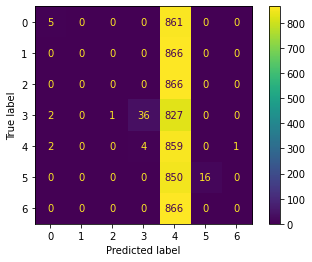

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 25%|████████████████████▊                          

              precision    recall  f1-score   support

           0       0.56      0.01      0.01       866
           1       0.00      0.00      0.00       866
           2       0.00      0.00      0.00       866
           3       0.90      0.04      0.08       866
           4       0.14      0.99      0.25       866
           5       1.00      0.02      0.04       866
           6       0.00      0.00      0.00       866

    accuracy                           0.15      6062
   macro avg       0.37      0.15      0.05      6062
weighted avg       0.37      0.15      0.05      6062

- Classifier RandomForest



k-fold: 100%|██████████████████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


F1:  96.33
Precision:  96.74
Recall:  96.1
Accuracy:  95.89


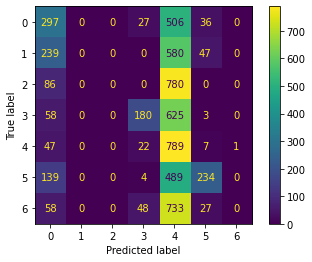

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 50%|█████████████████████████████████████████▌     

              precision    recall  f1-score   support

           0       0.32      0.34      0.33       866
           1       0.00      0.00      0.00       866
           2       0.00      0.00      0.00       866
           3       0.64      0.21      0.31       866
           4       0.18      0.91      0.29       866
           5       0.66      0.27      0.38       866
           6       0.00      0.00      0.00       866

    accuracy                           0.25      6062
   macro avg       0.26      0.25      0.19      6062
weighted avg       0.26      0.25      0.19      6062

- Classifier DecisionTreeClassifier



k-fold:   0%|                                                                                   | 0/10 [00:00<?, ?it/s]C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

k-fold:  10%|███████▌                                                                   | 1/10 [00:00<00:03,  2.92it/s]C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

k-fold:  20%|███████████████                                                            | 2/10 [00:00<00:02,  2.76it/s]C:\Users\CARLOS\anaconda3\lib\site

F1:  23.85
Precision:  33.78
Recall:  30.38
Accuracy:  32.84


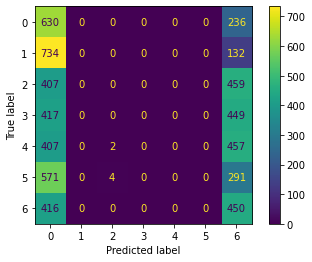

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 75%|███████████████████████████████████████████████

              precision    recall  f1-score   support

           0       0.18      0.73      0.28       866
           1       0.00      0.00      0.00       866
           2       0.00      0.00      0.00       866
           3       0.00      0.00      0.00       866
           4       0.00      0.00      0.00       866
           5       0.00      0.00      0.00       866
           6       0.18      0.52      0.27       866

    accuracy                           0.18      6062
   macro avg       0.05      0.18      0.08      6062
weighted avg       0.05      0.18      0.08      6062

- Classifier NaiveBayes



 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [05:21<01:47, 107.07s/it]


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [8]:
print('Baseline lexical features')
for clf_name, clf in tqdm(classifiers.items()):
    print('- Classifier ' + clf_name)
    accuracies_scores = []
    f1_scores =[]
    precision_scores = []
    recall_scores = []
    for train_index, test_index in tqdm(k_fold.split(x_train, y_train), total=k_fold.get_n_splits(), desc="k-fold"):
        data_train = x_train[train_index]
        target_train = y_train[train_index]

        data_test = x_train[test_index]
        target_test = y_train[test_index]

        clf.fit(data_train, target_train)
        predict = clf.predict(data_test)
        # Accuracy
        accuracy = accuracy_score(target_test, predict, normalize=True)
        accuracies_scores.append(accuracy)
        
        f1 = f1_score(target_test, predict, average="macro")
        f1_scores.append(f1)
        
        precision = precision_score(target_test, predict, average="macro")
        precision_scores.append(precision)
        
        recall = recall_score(target_test, predict, average="macro")
        recall_scores.append(recall)
        
    print('F1: ', round(np.mean(f1_scores) * 100, 2))
    print('Precision: ', round(np.mean(precision_scores) * 100, 2))
    print('Recall: ', round(np.mean(recall_scores) * 100, 2))
    print('Accuracy: ', round(np.mean(accuracies_scores) * 100, 2))
    
    plot_confusion_matrix(clf, x_test, y_test) 
    plt.show()
    
    # Evaluation
    y_test_predict = clf.predict(x_test)
    print(classification_report(y_test, y_test_predict))